In [ ]:
# Study on living area per household

import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Workbook contains no default style")

file_path = "../data/xlsx/가구 주거면적.xlsx"
df = pd.read_excel(file_path)
df

,Unnamed: 0,Unnamed: 1,계,40㎡ 이하,40㎡〜50㎡,50㎡ 〜60㎡,60㎡ 〜85㎡,85㎡ 〜102㎡,102㎡ 〜135㎡,135㎡ 초과,모름/무응답,평균\n(㎡)
0,전체가구,2017,100,20.6,12.2,18.1,32.9,8.0,6.2,1.8,0.1,65.4
1,NaN,2018,100,21.2,11.1,17.2,33.9,7.6,6.8,2.0,0.1,66.2
2,NaN,2019,100,20.5,9.9,14.0,32.8,11.3,8.7,2.6,0.2,68.1
3,NaN,2020,100,19.5,9.9,14.5,31.2,12.8,8.9,2.8,0.5,68.9
4,NaN,2021,100,21.3,9.1,13.5,31.7,11.6,9.6,2.6,0.5,68.3
5,1인가구,2017,100,52.9,14.4,11.3,15.8,3.4,1.5,0.6,0.1,44.7
6,NaN,2018,100,54.4,13.5,11.4,15.5,3.3,1.4,0.3,0.2,44.0
7,NaN,2019,100,53.7,11.7,10.4,17.1,4.3,2.0,0.6,0.3,45.1
8,NaN,2020,100,50.5,13.5,11.2,16.7,4.7,2.1,0.4,0.9,46.2
9,NaN,2021,100,54.6,12.6,10.2,15.3,4.0,2.1,0.5,0.7,44.4


In [58]:
df['가구'] = df['Unnamed: 0'] 
df['년도'] = df['Unnamed: 1'] 

df['가구'] = df['가구'].ffill() 
first_all_idx   = df[df['가구'] == '전체가구'].index[0]          
first_single_idx = df[df['가구'] == '1인가구'].index[0]          

df.loc[:first_all_idx - 1, '구분'] = '전체가구'                  
df.loc[first_single_idx:, '구분'] = '1인가구'                   


area = df.pivot_table(
    index=['가구', '년도'], 
    values=['40㎡ 이하', '40㎡〜50㎡', '50㎡ 〜60㎡', '60㎡ 〜85㎡', 
            '102㎡ 〜135㎡', '135㎡ 초과','모름/무응답' ], 
    aggfunc='first',
    observed=False
)
columns_order = [
    '40㎡ 이하', '40㎡〜50㎡', '50㎡ 〜60㎡', '60㎡ 〜85㎡',
    '102㎡ 〜135㎡', '135㎡ 초과', '모름/무응답'
]
area = area[columns_order]
area

40㎡ 이하  40㎡〜50㎡  50㎡ 〜60㎡  60㎡ 〜85㎡  102㎡ 〜135㎡  135㎡ 초과  모름/무응답
가구   년도                                                                    
1인가구 2017    52.9     14.4      11.3      15.8         1.5      0.6     0.1
     2018    54.4     13.5      11.4      15.5         1.4      0.3     0.2
     2019    53.7     11.7      10.4      17.1         2.0      0.6     0.3
     2020    50.5     13.5      11.2      16.7         2.1      0.4     0.9
     2021    54.6     12.6      10.2      15.3         2.1      0.5     0.7
전체가구 2017    20.6     12.2      18.1      32.9         6.2      1.8     0.1
     2018    21.2     11.1      17.2      33.9         6.8      2.0     0.1
     2019    20.5      9.9      14.0      32.8         8.7      2.6     0.2
     2020    19.5      9.9      14.5      31.2         8.9      2.8     0.5
     2021    21.3      9.1      13.5      31.7         9.6      2.6     0.5

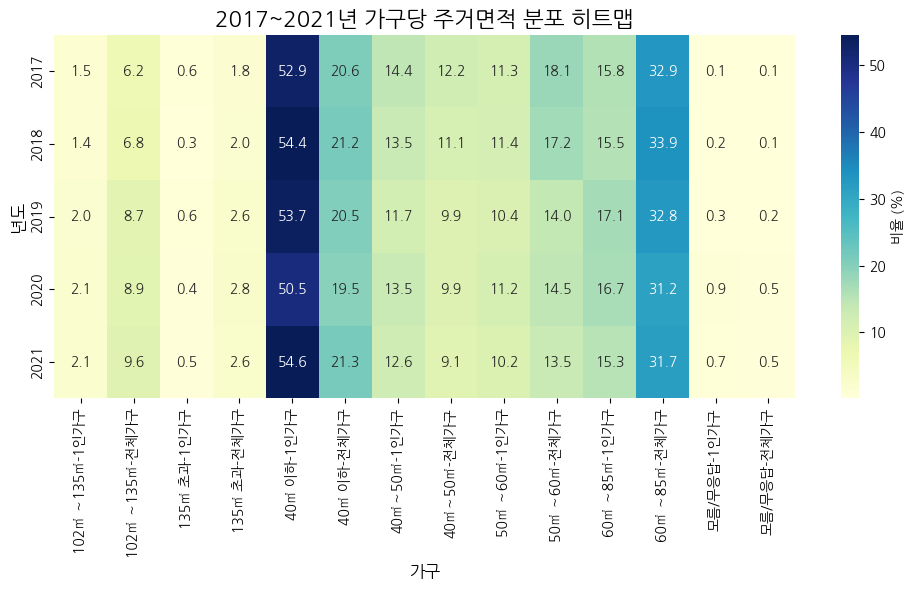

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 
%matplotlib inline

heatmap_data = area.reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.pivot_table(index='년도', columns='가구', values=columns_order),
            annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': '비율 (%)'})

plt.title('2017~2021년 가구당 주거면적 분포 히트맵', fontsize=16)
plt.ylabel('년도', fontsize=12)
plt.xlabel('가구', fontsize=12)
plt.tight_layout()
plt.show()
